In [1]:
# A1: Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
# Load medical Data From CSV file
medical = pd.read_csv('medical_clean.csv')

# Check what has been uploaded
medical.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [3]:
# Remove leading spaces in column names
medical.columns = medical.columns.str.strip()

# Rename the 8 survey columns for better interpretation
medical.rename(columns={
    'Item1': 'Timely_admission',
    'Item2': 'Timely_treatment',
    'Item3': 'Timely_visits',
    'Item4': 'Reliability',
    'Item5': 'Options',
    'Item6': 'Hours_of_treatment',
    'Item7': 'Courteous_staff',
    'Item8': 'Active_listening'
}, inplace=True)

# Check  the changes occured
medical.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Timely_admission,Timely_treatment,Timely_visits,Reliability,Options,Hours_of_treatment,Courteous_staff,Active_listening
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


Contingency Table:
Timely_admission    1    2     3     4    5    6  7  8
ReAdmis                                               
No                134  823  2137  2184  891  155  7  0
Yes                79  492  1267  1271  486   70  3  1

Percentage of distribution of Timely_admissions
Timely_admission         1          2          3          4          5         6         7         8
ReAdmis                                                                                             
No                2.116569  12.999526  33.754541  34.496920  14.073606  2.448270  0.110567  0.000000
Yes               2.153175  13.409648  34.532570  34.641592  13.246116  1.907877  0.081766  0.027255


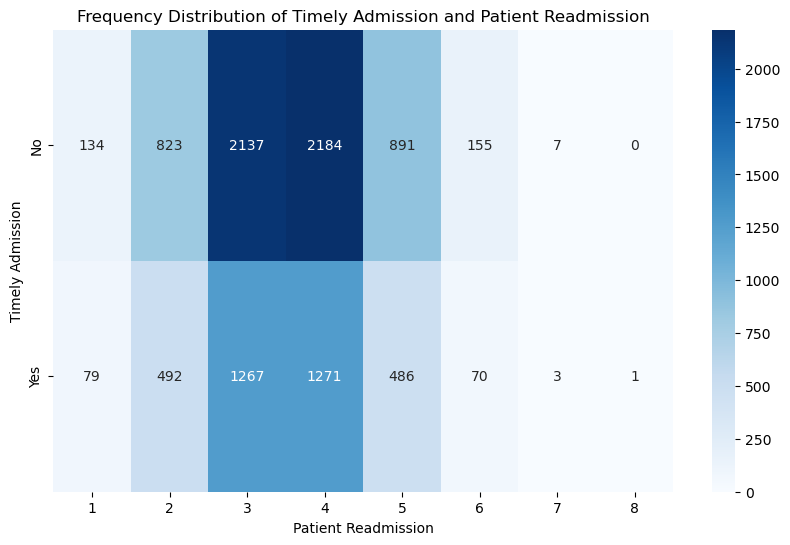


Chi-square test results:
Chi-square statistic: 6.8269565562495975
P-value: 0.44711691481022053
Degrees of freedom: 7
Expected frequencies:
[[1.3485030e+02 8.3252650e+02 2.1550724e+03 2.1873605e+03 8.7177870e+02
  1.4244750e+02 6.3310000e+00 6.3310000e-01]
 [7.8149700e+01 4.8247350e+02 1.2489276e+03 1.2676395e+03 5.0522130e+02
  8.2552500e+01 3.6690000e+00 3.6690000e-01]]

The p-value is greater than or equal to 0.05, indicating no significant association between 'ReAdmis' and 'Timely_admission'.


In [4]:
# B1: Chi-square test of independence
contingency_table = pd.crosstab(medical['ReAdmis'], medical['Timely_admission'])
chi2_stat, p_val, dof, expected_freq = chi2_contingency(contingency_table)

# Print contingency table
print("Contingency Table:")
print(contingency_table.to_string())

# Distribution of Timely_admissions
print('\nPercentage of distribution of Timely_admissions')
contingency_pct = pd.crosstab(medical['ReAdmis'], medical['Timely_admission'], normalize='index') * 100
print(contingency_pct.to_string())

# Create and display heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Frequency Distribution of Timely Admission and Patient Readmission')
plt.xlabel('Patient Readmission')
plt.ylabel('Timely Admission')
plt.show()

# Print chi-square test results
print("\nChi-square test results:")
print('Chi-square statistic:', chi2_stat)
print('P-value:', p_val)
print('Degrees of freedom:', dof)
print('Expected frequencies:')
print(expected_freq)

# Print interpretation of p-value
if p_val < 0.05:
    print("\nThe p-value is less than 0.05, indicating a significant association between 'ReAdmis' and 'Timely_admission'.")
else:
    print("\nThe p-value is greater than or equal to 0.05, indicating no significant association between 'ReAdmis' and 'Timely_admission'.")
    


Descriptive Statistics for Timely_admission:
count    10000.000000
mean         3.518800
std          1.031966
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          8.000000
Name: Timely_admission, dtype: float64

Descriptive Statistics for Timely_treatment:
count    10000.000000
mean         3.506700
std          1.034825
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Timely_treatment, dtype: float64

Descriptive Statistics for Initial_days:
count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

Descriptive Statistics for TotalCharge:
count    10000.000000
mean      5312.172769
std       2180.393838
min       1938.312067
25%       3179.374015
50%       5213.952000
75%       7459.699750
max       9180.728000
Name: Tot

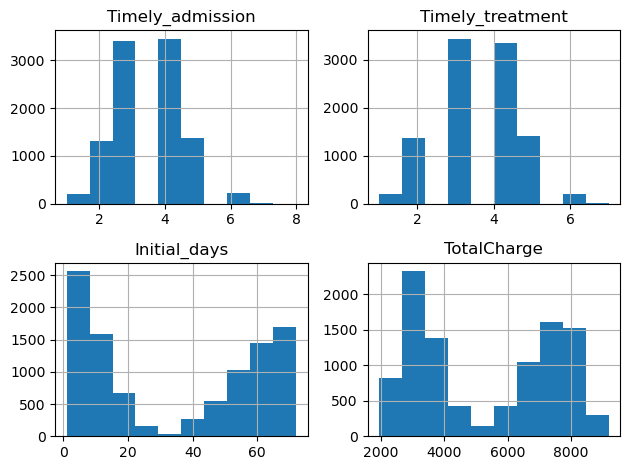

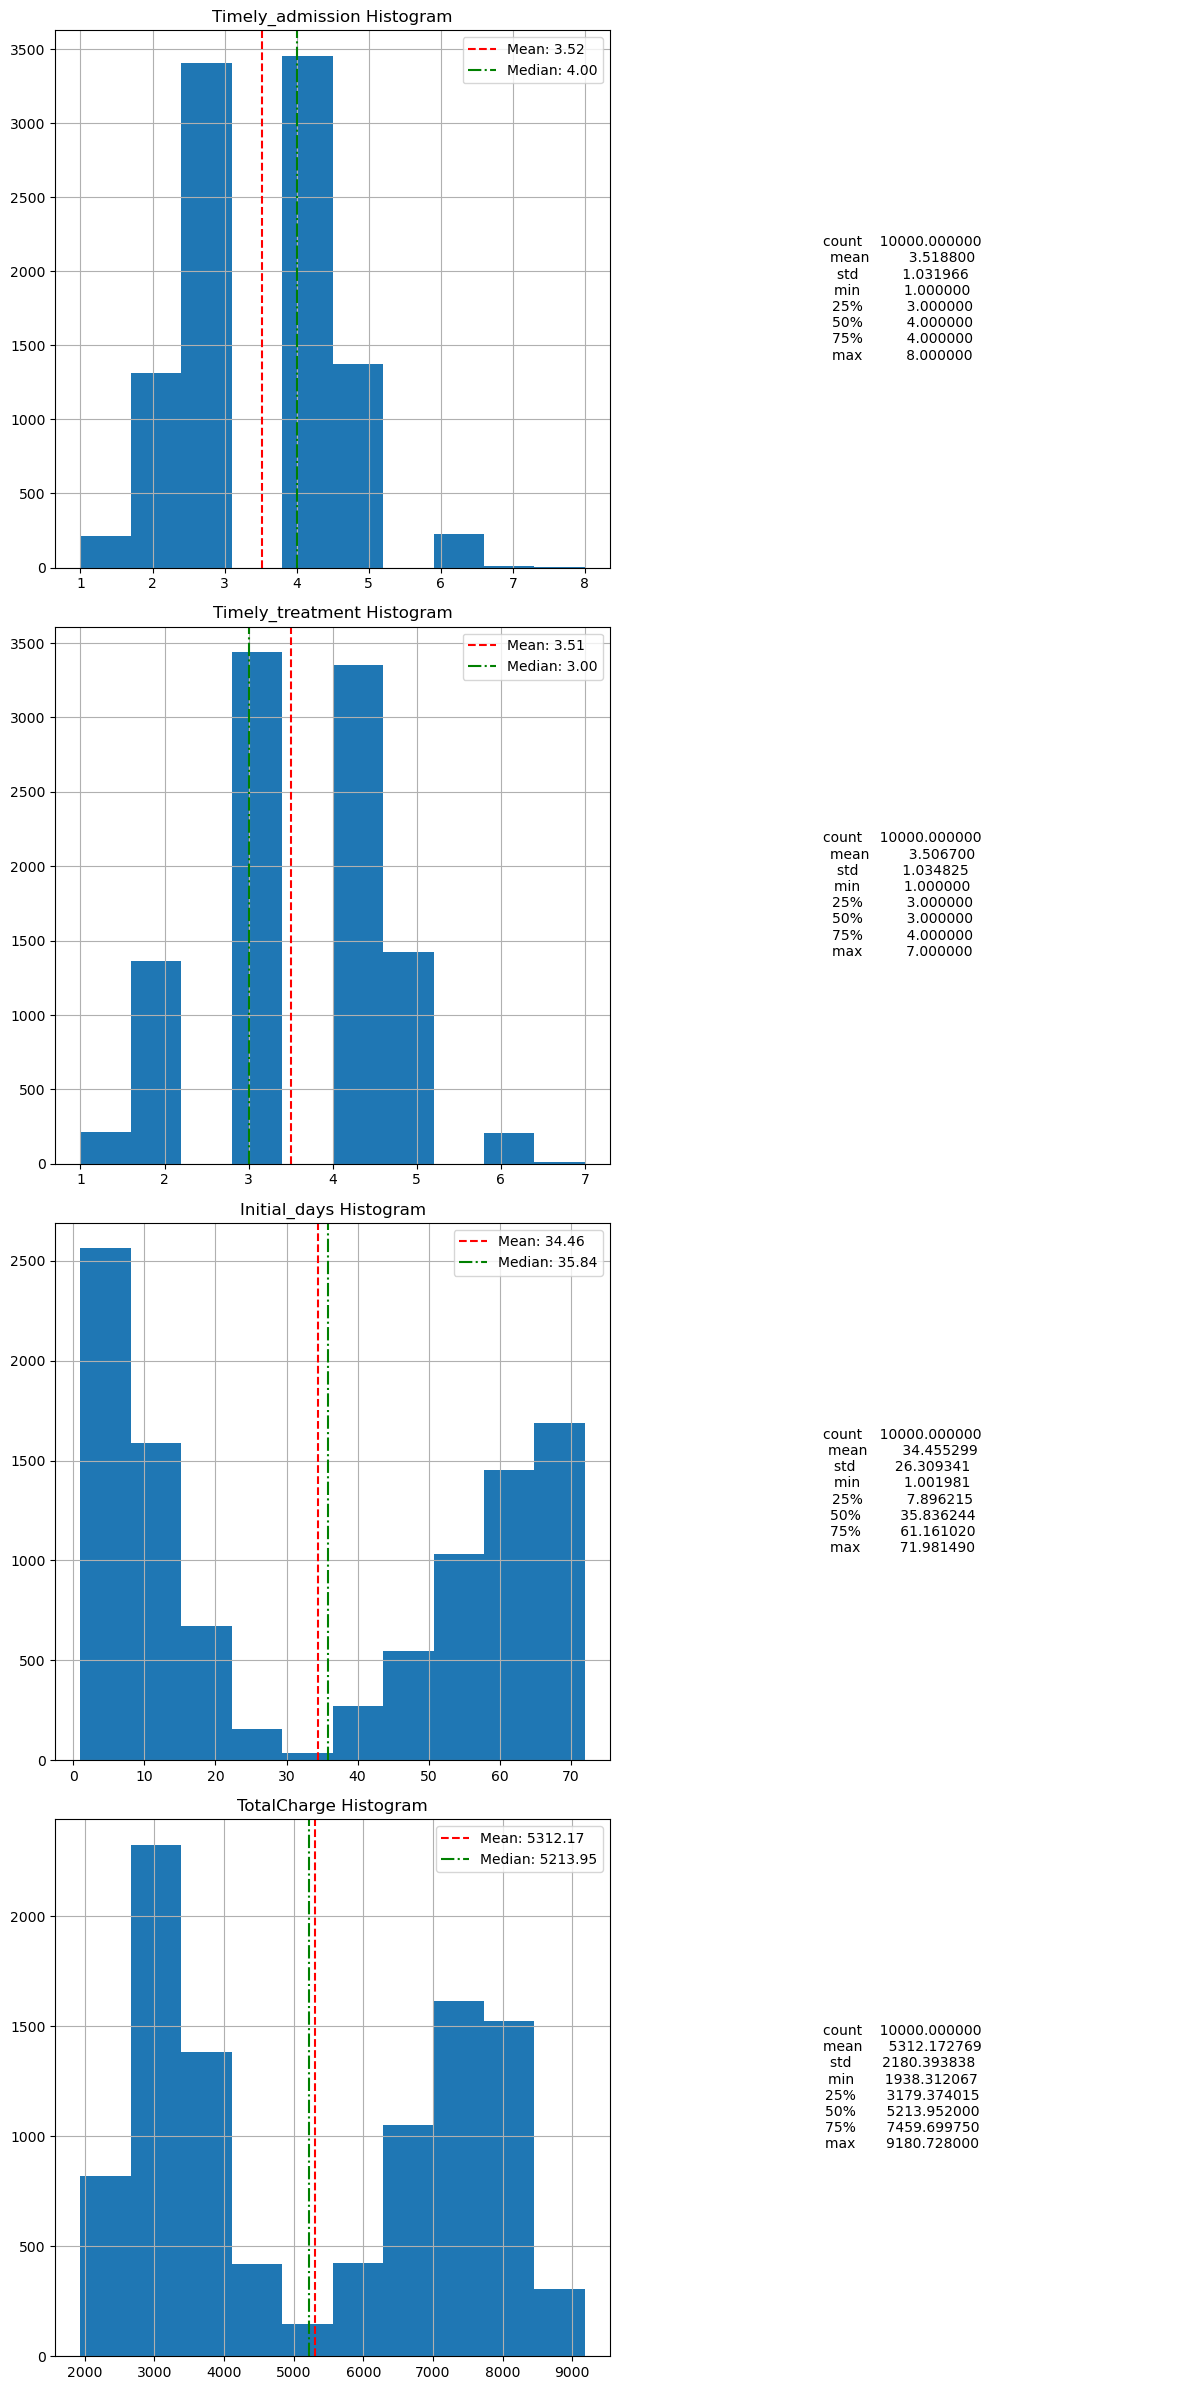

In [5]:
# C: Univariate statistics
# Select columns of interest
columns_of_interest = ['Timely_admission', 'Timely_treatment', 'Initial_days', 'TotalCharge']

# Print descriptive statistics for each column
for column in columns_of_interest:
    print(f"Descriptive Statistics for {column}:")
    print(medical[column].describe())
    print()

# Create Histogram
medical[columns_of_interest].hist()
plt.tight_layout()
plt.show()

# Create subplots for histograms
fig, axes = plt.subplots(nrows=len(columns_of_interest), ncols=2, figsize=(12, len(columns_of_interest) * 6))

for i, column in enumerate(columns_of_interest):
    # Plot histogram
    medical[column].hist(ax=axes[i, 0])
    axes[i, 0].set_title(f'{column} Histogram')
    
    # Calculate descriptive statistics
    stats = medical[column].describe()
    mean = stats['mean']
    median = stats['50%']
    axes[i, 0].axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    axes[i, 0].axvline(median, color='green', linestyle='-.', label=f'Median: {median:.2f}')
    axes[i, 0].legend()
    
    # Print descriptive statistics
    axes[i, 1].axis('off')  # Hide second axis
    axes[i, 1].text(0.5, 0.5, stats.to_string(), horizontalalignment='center', verticalalignment='center',
                    fontsize=10, wrap=True)

plt.tight_layout()
plt.show()

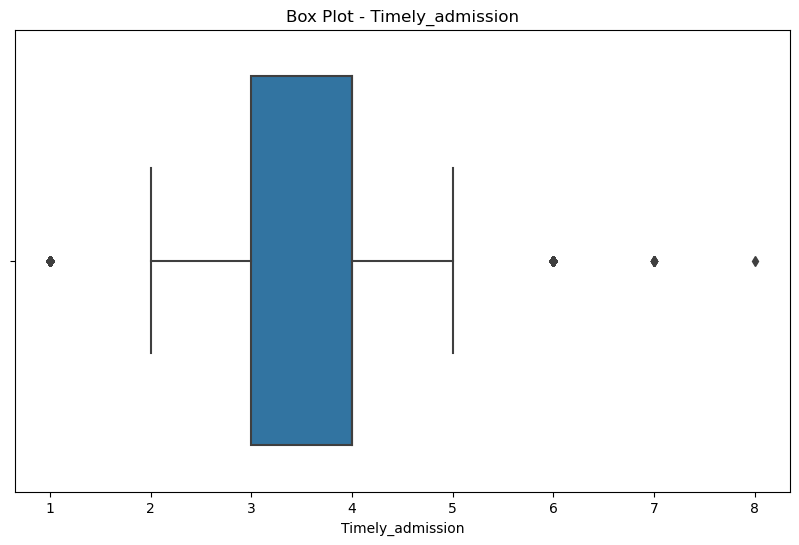

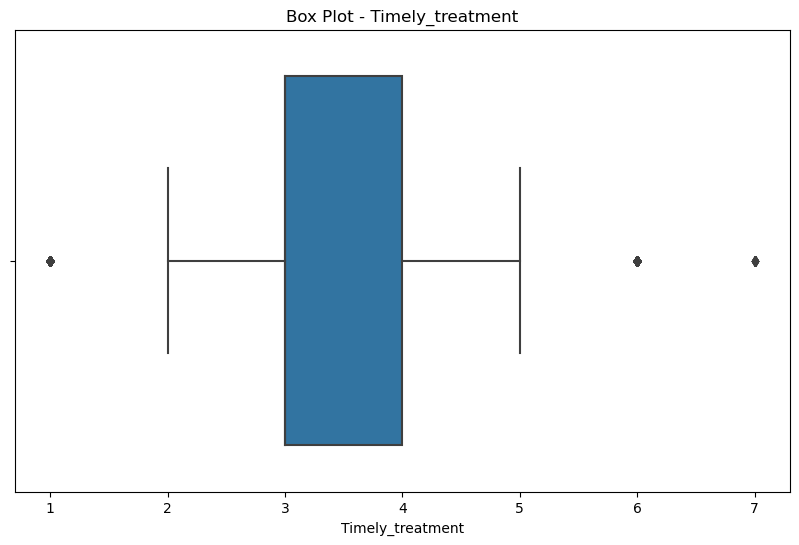

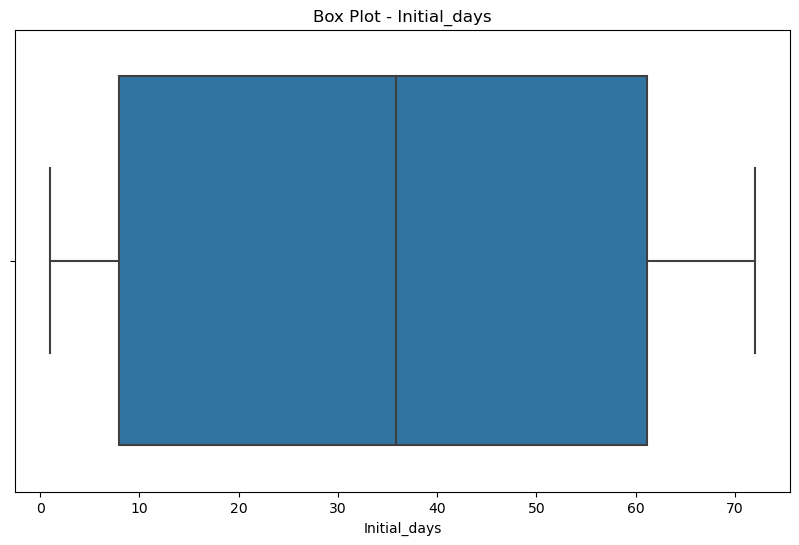

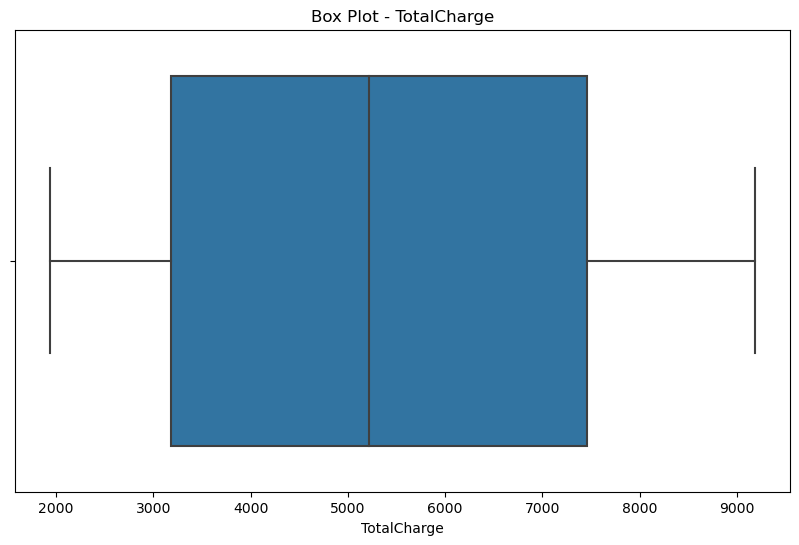


Bivariate Correlation Matrix:
              Initial_days  TotalCharge
Initial_days       1.00000      0.98764
TotalCharge        0.98764      1.00000


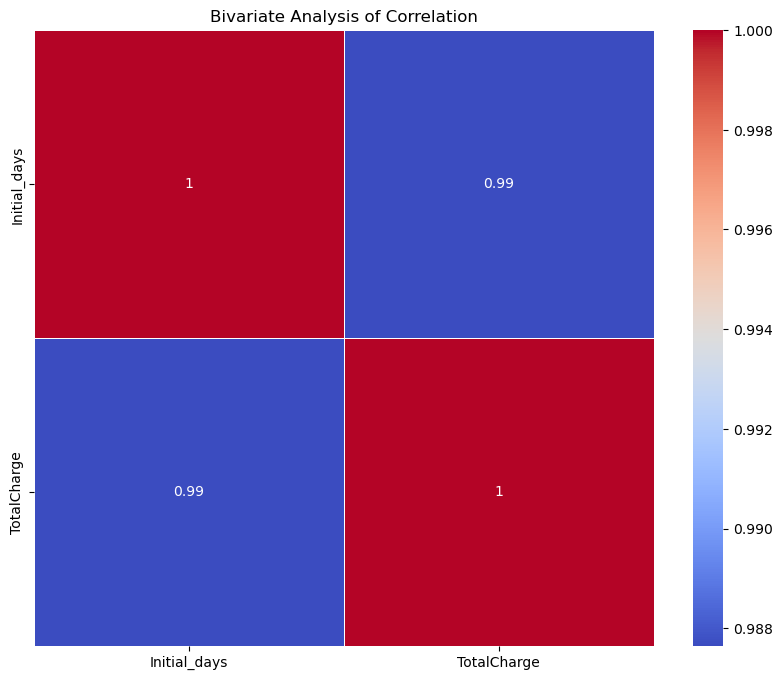

In [6]:
# D1: Bivariate statistics visual
# Select columns for boxplot
columns_of_interest = ['Timely_admission', 'Timely_treatment', 'Initial_days', 'TotalCharge']

# Display boxplots for each column
for column in columns_of_interest:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=medical[column])
    plt.title(f'Box Plot - {column}')
    plt.show()

# Select continuous variables of interest
continuous_variables = ['Initial_days', 'TotalCharge']

# Calculate the correlation matrix
correlation_matrix = medical[continuous_variables].corr()
print("\nBivariate Correlation Matrix:")
print(correlation_matrix)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Bivariate Analysis of Correlation')
plt.show()

# Calculate descriptive statistics for timely admission
timely_admission_stats = medical['Timely_admission'].describe()

# Calculate mode for patient readmission status
mode_readmission = medical['ReAdmis'].mode()[0]

In [7]:
# Bivariate Descriptive statistics two categorical variables
print("Timely Admission Statistics:")
print(timely_admission_stats)
print("\nMode of Patient Readmission:", mode_readmission)

# Bivariate Descriptive statistics two continuous variables
total_charge = medical['TotalCharge']
initial_days = medical['Initial_days']

# Calculate the correlation coefficient
correlation_coefficient = total_charge.corr(initial_days)
print("Correlation Coefficient between TotalCharge and Initial_days:", correlation_coefficient)


Timely Admission Statistics:
count    10000.000000
mean         3.518800
std          1.031966
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          8.000000
Name: Timely_admission, dtype: float64

Mode of Patient Readmission: No
Correlation Coefficient between TotalCharge and Initial_days: 0.9876402655398169


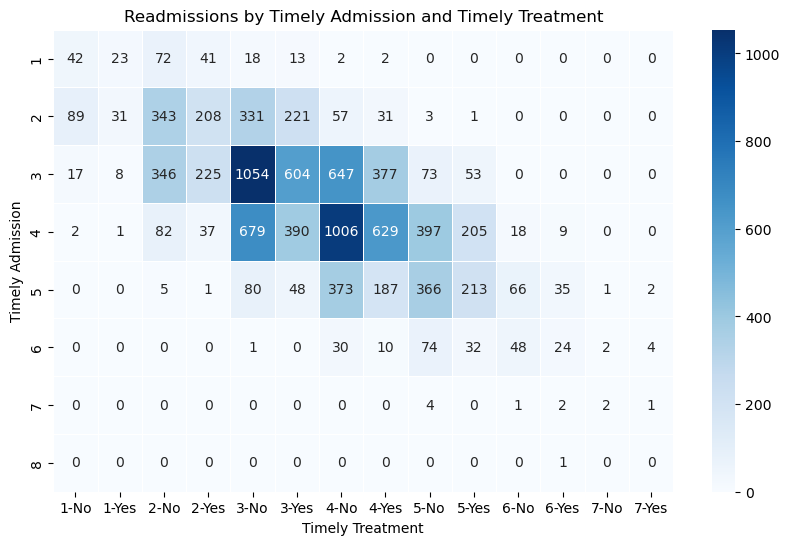

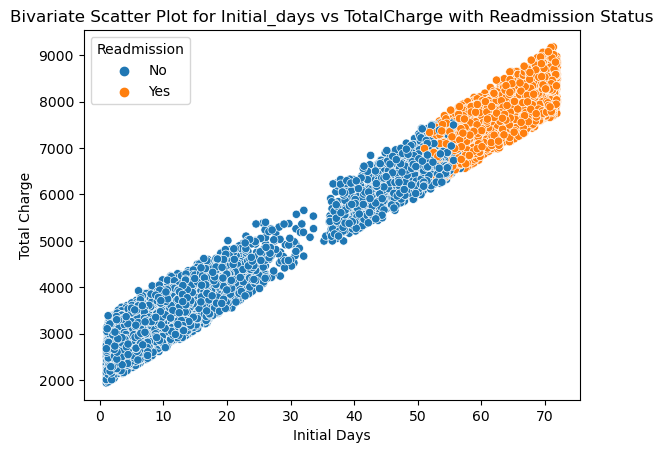

In [8]:
# Create pivot table for timely admission and timely treatment
cross_tab = pd.crosstab(index=medical['Timely_admission'], columns=[medical['Timely_treatment'], medical['ReAdmis']])
pivot_table = cross_tab.pivot_table(index='Timely_admission', aggfunc='mean', fill_value=0)

# Bivariate heatmap for Timely Treatment and Timely Admission
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Readmissions by Timely Admission and Timely Treatment')
plt.xlabel('Timely Treatment')
plt.ylabel('Timely Admission')
plt.show()

# Bivariate scatter plot for Initial_days vs TotalCharge
sns.scatterplot(x='Initial_days', y='TotalCharge', hue='ReAdmis', data=medical)
plt.title('Bivariate Scatter Plot for Initial_days vs TotalCharge with Readmission Status')
plt.xlabel('Initial Days')
plt.ylabel('Total Charge')
plt.legend(title='Readmission')
plt.show()
